# pm2.5

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

讀檔

In [29]:
PRSA_data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
PRSA_data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


刪除有缺失值的整筆資料

In [30]:
PRSA_data.dropna(axis=0, inplace = True)
PRSA_data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [31]:
PRSA_data.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

合併年月日時

In [32]:
datetime=pd.to_datetime(PRSA_data[['year', 'month', 'day', 'hour']])

datetime.head()

24   2010-01-02 00:00:00
25   2010-01-02 01:00:00
26   2010-01-02 02:00:00
27   2010-01-02 03:00:00
28   2010-01-02 04:00:00
dtype: datetime64[ns]

In [33]:
PRSA_data=PRSA_data.drop(columns=['year', 'month', 'day','hour'])
PRSA_data.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
PRSA_data.insert(loc=1, column='Datetime', value=datetime)
PRSA_data.head()

,No,Datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


將每筆資料依照時間排序

In [35]:
PRSA_data.sort_values(by='Datetime')

,No,Datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
29,30,2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
30,31,2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
31,32,2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
32,33,2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0
33,34,2010-01-02 09:00:00,132.0,-7,-5.0,1025.0,SE,14.30,0,0


圖形呈現

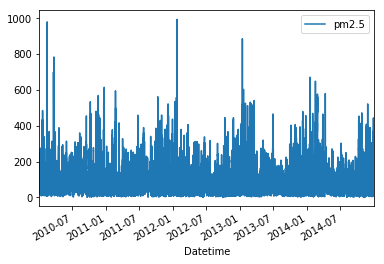

In [36]:
PRSA_data.plot('Datetime','pm2.5')

針對pm2.5欄位做標準化

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
PRSA_data['pm2.5']
PRSA_data['pm2.5']=scaler.fit_transform(PRSA_data[['pm2.5']])
PRSA_data.head()

,No,Datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010-01-02 00:00:00,0.129779,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010-01-02 01:00:00,0.148893,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010-01-02 02:00:00,0.159960,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010-01-02 03:00:00,0.182093,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010-01-02 04:00:00,0.138833,-7,-5.0,1022.0,SE,6.25,2,0


In [38]:
PRSA_data = PRSA_data.reset_index(drop=True)
PRSA_data.head()

,No,Datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,25,2010-01-02 00:00:00,0.129779,-16,-4.0,1020.0,SE,1.79,0,0
1,26,2010-01-02 01:00:00,0.148893,-15,-4.0,1020.0,SE,2.68,0,0
2,27,2010-01-02 02:00:00,0.159960,-11,-5.0,1021.0,SE,3.57,0,0
3,28,2010-01-02 03:00:00,0.182093,-7,-5.0,1022.0,SE,5.36,1,0
4,29,2010-01-02 04:00:00,0.138833,-7,-5.0,1022.0,SE,6.25,2,0


資料切割
依照時間(2014/1/1)前後區分成訓練資料與測試資料

In [39]:
t=PRSA_data['Datetime']=='2014-01-01 00:00:00'
PRSA_data[t]

,No,Datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
33096,35065,2014-01-01,0.024145,-20,7.0,1014.0,NW,143.48,0,0


In [40]:
print(PRSA_data.describe())
print(PRSA_data.dtypes)
print(PRSA_data.shape)

                 No         pm2.5          DEWP          TEMP          PRES  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean   22279.380104      0.099208      1.750174     12.401561   1016.442896   
std    12658.168415      0.092606     14.433658     12.175215     10.300733   
min       25.000000      0.000000    -40.000000    -19.000000    991.000000   
25%    11464.000000      0.029175    -10.000000      2.000000   1008.000000   
50%    22435.000000      0.072435      2.000000     14.000000   1016.000000   
75%    33262.000000      0.137827     15.000000     23.000000   1025.000000   
max    43824.000000      1.000000     28.000000     42.000000   1046.000000   

                Iws            Is            Ir  
count  41757.000000  41757.000000  41757.000000  
mean      23.866747      0.055344      0.194866  
std       49.617495      0.778875      1.418165  
min        0.450000      0.000000      0.000000  
25%        1.790000      0.000000     

In [41]:
print(PRSA_data['cbwd'].unique())

['SE' 'cv' 'NW' 'NE']


In [42]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
temp=PRSA_data['cbwd']
enc.fit(temp)
temp=enc.transform(temp)
print(temp)

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encoded=ohe.fit(temp.reshape(-1,1))
temp=encoded.transform(temp.reshape(-1,1)).toarray()
print(temp)

[2 2 2 ... 1 1 1]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


C:\Users\qucae\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [43]:
labels = np.array(PRSA_data['pm2.5'])
PRSA_data=PRSA_data.drop(columns=['cbwd','No','pm2.5','Datetime'])
Features = np.concatenate([np.array(PRSA_data)],axis = 1)

In [44]:
print(Features.shape)
print(Features[:5, :])

(41757, 6)
[[-1.600e+01 -4.000e+00  1.020e+03  1.790e+00  0.000e+00  0.000e+00]
 [-1.500e+01 -4.000e+00  1.020e+03  2.680e+00  0.000e+00  0.000e+00]
 [-1.100e+01 -5.000e+00  1.021e+03  3.570e+00  0.000e+00  0.000e+00]
 [-7.000e+00 -5.000e+00  1.022e+03  5.360e+00  1.000e+00  0.000e+00]
 [-7.000e+00 -5.000e+00  1.022e+03  6.250e+00  2.000e+00  0.000e+00]]


Split the dataset

In [45]:
indx=33096

x_train = Features[:indx,:]
y_train = np.ravel(labels[:indx])
x_test = Features[indx:,:]
y_test = np.ravel(labels[indx:])

print(x_train.shape)
print(x_test.shape)
print(x_train[0].shape)

(33096, 6)
(8661, 6)
(6,)


In [47]:
x_train = x_train.reshape(33096,6,1)
x_test = x_test.reshape(8661,6,1)
print(x_train[0].shape)
print(x_train[0])


(6, 1)
[[ -16.  ]
 [  -4.  ]
 [1020.  ]
 [   1.79]
 [   0.  ]
 [   0.  ]]


In [48]:
# Import Keras libraries and packages
from keras.models import Sequential  #用來啟動 NN
from keras.layers import Conv2D  # Convolution Operation
from keras.layers import Conv1D
from keras.layers import MaxPooling2D # Pooling
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense # Fully Connected Networks


In [60]:
# initializing CNN
model = Sequential()


model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(6,1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(64, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 5, 64)             192       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 33096 samples, validate on 8661 samples
Epoch 1/20
33096/33096 [==============================] - 4s 109us/step - loss: 6.5320 - acc: 0.0000e+00 - val_loss: 7.1782 - val_acc: 0.0000e+00
Epoch 2/20
33096/33096 [==============================] - 3s 105us/step - loss: 5.2131 - acc: 0.0000e+00 - val_loss: 4.8578 - val_acc: 0.0000e+00
Epoch 3/20
33096/33096 [==============================] - 3s 103us/step - loss: 3.2257 - acc: 3.0215e-05 - val_loss: 1.7618 - val_acc: 0.0000e+00
Epoch 4/20
33096/33096 [==============================] - 3s 96us/step - loss: 3.1613 - acc: 3.0215e-05 - val_loss: 9.0825 - val_acc: 0.0000e+00
Epoch 5/20
33096/33096 [==============================] - 3s 98us/step - loss: 2.9683 - acc: 3.0215e-05 - val_loss: 4.9421 - val_acc: 0.0000e+00
Epoch 6/20
33096/33096 [==============================] - 3s 98us/step - loss: 2.1961 - acc: 0.0000e+00 - val_loss: 1.4725 - val_acc: 0.0000e+00
Epoch 7/20
33096/33096 [==============================] - 3s 100us/step - loss

In [62]:
print(model.predict(x_test[:5]))
y_test[:5]


[[-0.17439362]
 [-0.17347237]
 [-0.16886291]
 [-0.16848716]
 [-0.13448247]]


array([0.02414487, 0.05331992, 0.06539235, 0.07042254, 0.07947686])

In [63]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = model.predict(x_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.0450683769497749
Root Mean Square Error = 0.2122931391961947
Mean Absolute Error    = 0.19580554718260965
Median Absolute Error  = 0.1792523407000651
R^2                    = -4.090714886434076
Adjusted R^2           = -4.106636269723051


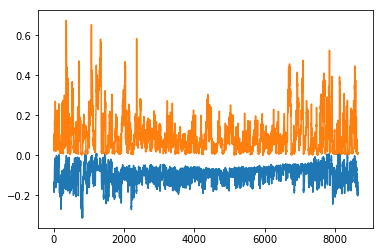

In [64]:
plt.plot(model.predict(x_test))
plt.plot(y_test)

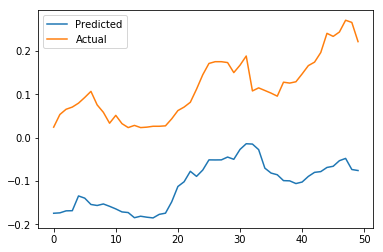

In [65]:
plt.plot(model.predict(x_test[:50]))
plt.plot(y_test[:50])
plt.legend(['Predicted','Actual'], loc=2)